# **SENTIMENT ANALYSIS OF RESTAURANT REVIEWS**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**IMPORTING THE CSV FILE **

In [2]:
df = pd.read_csv('Restaurant_Reviews.csv', delimiter = '\t', quoting = 3)

In [3]:
import pandas as pd


In [4]:
# PRINTING THE FIRST FIVE ELEMENTS OF THE DATA
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


* Text preprocessing on a collection of reviews, including removing non-alphabetic characters, converting to lowercase, tokenization, stemming, removing stopwords, and rejoining the preprocessed words, *



In [5]:
# common preprocessing step for text data when performing natural language processing (NLP) tasks like sentiment analysis
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
#  Using scikit-learn's CountVectorizer to convert your preprocessed text data into a numerical format that can be used as input for machine learning models.
#  After running this code, we will have our text data in a numerical format suitable for training machine learning models, and X and y can be used for tasks like sentiment analysis or any other text classification task.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features =150)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

# Training a Gaussian Naive Bayes classifier on text data and evaluating its training and testing accuracy using scikit-learn.

In [25]:
# Demonstrates the use of scikit-learn to train a Naive Bayes classifier (specifically, GaussianNB) on the text data and evaluate its performance using accuracy.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=0)

model = GaussianNB()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy*100}%")

y_test_pred = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {testing_accuracy*100}%")

Training Accuracy: 79.48051948051949%
Testing Accuracy: 74.34782608695653%


**CONFUSION MATRIX FOR GUASSIANNB MODEL**

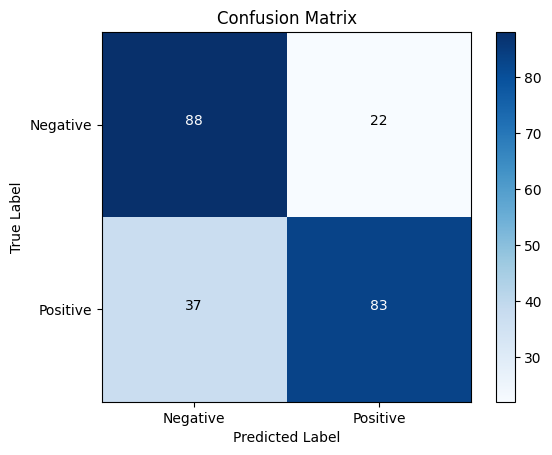

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Train the GaussianNB model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Define the class labels
classes = ['Negative', 'Positive']  # Replace with your specific class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

** Using Grid Search for parameter tuning with a Support Vector Machine (SVM) model in scikit-learn:**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

# Create an SVM model
model = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Using scikit-learn to train a Support Vector Machine (SVM) classifier with a linear kernel on data

In [29]:
# Demonstrates the use of scikit-learn to train a Support Vector Machine (SVM) classifier with a linear kernel on your text data and evaluate its performance using accuracy.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=1)

model = SVC(C=1.0, kernel='linear', gamma='auto')

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy*100}%")

y_test_pred = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {testing_accuracy*100}%")

Training Accuracy: 85.77464788732394%
Testing Accuracy: 80.3448275862069%


# Confusion matrix for the SVM

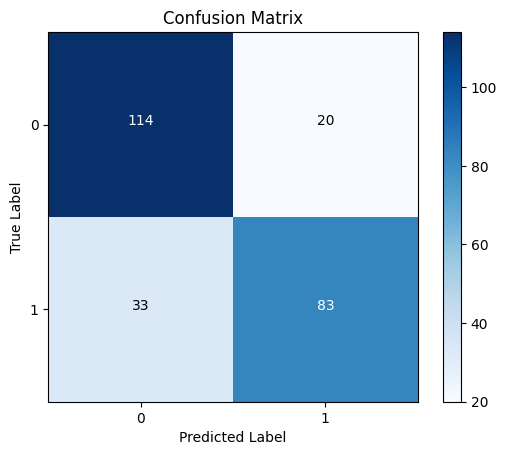

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Train the SVM model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Define the class labels
classes = [0, 1]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

# Splitting  the data into training and testing sets, trains a K-Nearest Neighbors (KNN) classifier

In [33]:
# Demonstrates the use of scikit-learn to train a K-Nearest Neighbors (KNN) classifier on your text data and evaluate its performance using accuracy.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Initialize the KNN model, specifying the number of neighbors (k)
model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training set
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy*100}%")

# Make predictions on the testing set
y_test_pred = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {testing_accuracy*100}%")

Training Accuracy: 77.06666666666668%
Testing Accuracy: 74.0%


# Confusion matrix for KNeighbors classifier

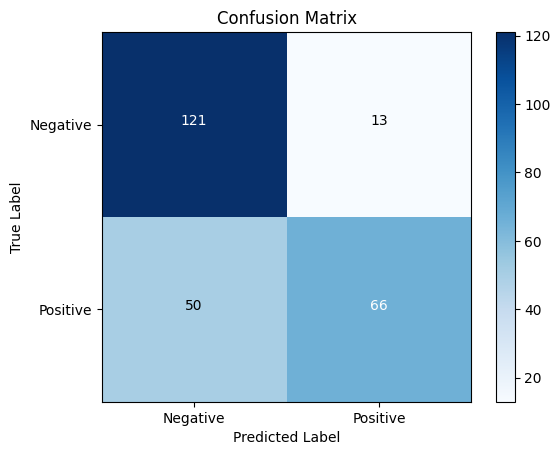

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN classifier
model = KNeighborsClassifier(n_neighbors=3) # set the number of neighbors
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Define the class labels
classes = ['Negative', 'Positive'] # Replace with your specific class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

PREDICTING A NEW UNSEEN DATA

In [40]:
#predicting new unseen data
new_review = '"Neither good nor bad, just an average place to eat."'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model.predict(new_X_test)
print(new_y_pred)

[0]


Using Grid Search for parameter tuning with a MultinomialNB model in scikit-learn:

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10]
}

# Create a MultinomialNB model
model = MultinomialNB()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Training a Multinomial Naive Bayes classifier

In [38]:
# demonstrates the use of scikit-learn to train Multi-NomialMB classifier on the text data and evaluate its performance using accuracy.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22,random_state=0)

# Initialize the MultinomialNB model
model = MultinomialNB()

# Train the model using the training set
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy*100}%")

# Make predictions on the testing set
y_test_pred = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {testing_accuracy*100}%")

Training Accuracy: 81.15384615384616%
Testing Accuracy: 76.36363636363637%


CONFUSION MATRIX FOR MULTINOMIAL NAIVE BAYES CLASSIFIER

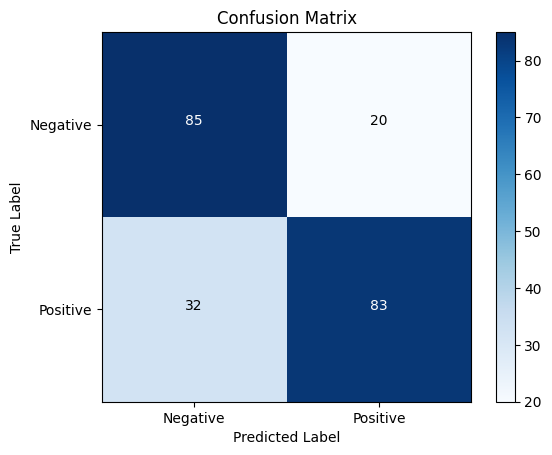

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Define the class labels
classes = ['Negative', 'Positive']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()


PREDICTING NEW UNSEEN DATA

In [21]:
# preprocesses a new review, converts it into a numerical format using the same preprocessing steps and CountVectorizer, and then uses a trained model to predict its sentiment
new_review = 'The food is not that good'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model.predict(new_X_test)
print(new_y_pred)

[0]


In [ ]:
# preprocesses a new review, converts it into a numerical format using the same preprocessing steps and CountVectorizer, and then uses a trained model to predict its sentiment
new_review = 'I love this place so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model.predict(new_X_test)
print(new_y_pred)

[1]


In [ ]:
# predicting new unseen data
new_review = 'not that good'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model.predict(new_X_test)
print(new_y_pred)

[0]
